In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# New Section

In [ ]:
data = pd.read_csv("bread_basket.csv")


In [ ]:
print('DataFrame shape :', data.shape)

data.head()

DataFrame shape : (20507, 5)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [ ]:
#memformat waktu
data['date_time'] = pd.to_datetime(data['date_time'], format='%d-%m-%Y %H:%M')
data['date_time'].dtype


dtype('<M8[ns]')

In [ ]:
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.weekday
data['hour'] = data['date_time'].dt.hour
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,6,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,6,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,6,10


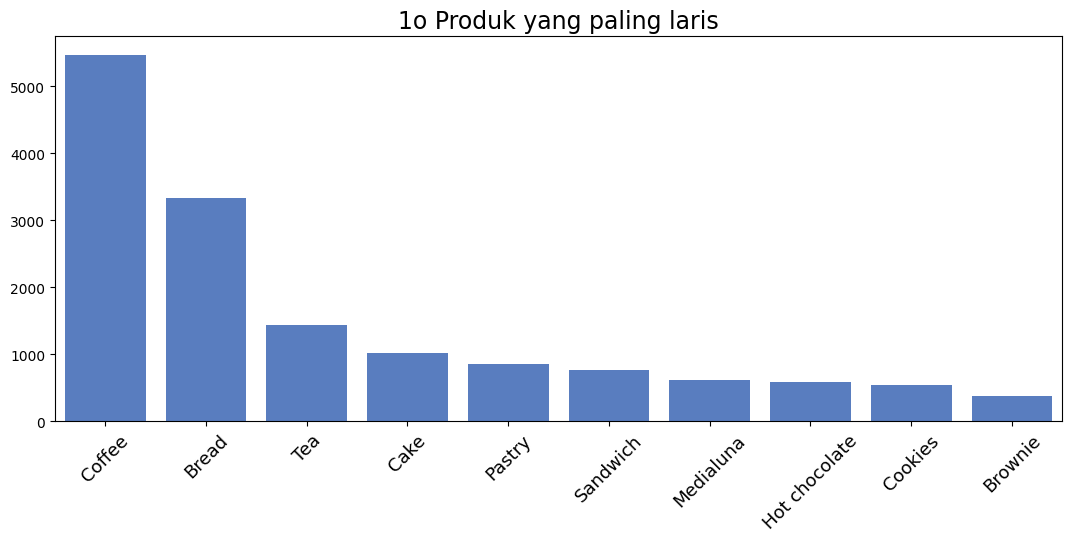

In [ ]:
plt.figure(figsize = (13,5))
sns.set_palette("muted")
sns.barplot(x=data["Item"].value_counts()[:10].index,
            y=data["Item"].value_counts()[:10].values )
plt.xlabel("")
plt.ylabel("")
plt.xticks(size=13, rotation = 45)
plt.title("1o Produk yang paling laris", size = 17)
plt.show()

Text(0.5, 1.0, 'Jumlah transaksi tiap bulan dari oktober - april')

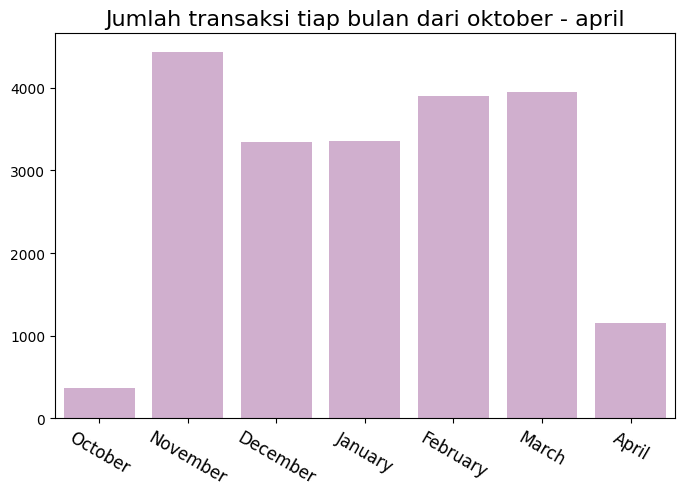

In [ ]:
#transaksi bulanan
data_perbulan = data.groupby("month")['Transaction'].count()
data_perbulan = pd.concat([data_perbulan.iloc[4:], data_perbulan.iloc[:4]])

plt.figure(figsize = (8,5))
sns.barplot(
    x = ["October", "November", "December", "January", "February", "March", "April"],
    y = data_perbulan.values, color = "#D5AAD3"
)
plt.xticks(size = 12, rotation = -30 )
plt.title("Jumlah transaksi tiap bulan dari oktober - april", size = 16)

Text(0.5, 1.0, 'Jumlah transaksi per hari')

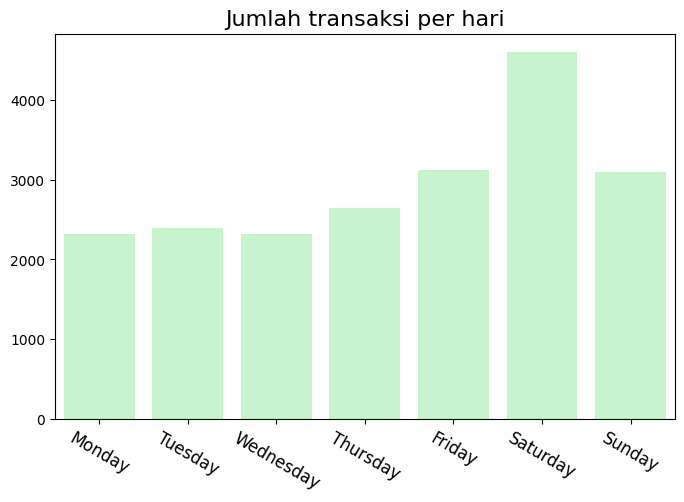

In [ ]:
# Transaksi per hari
data_perday = data.groupby('day')['Transaction'].count()

plt.figure(figsize= (8,5))
sns.barplot(
    x = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    y = data_perday.values, color="#BFFCC6")
plt.xticks(size = 12, rotation = -30)
plt.title("Jumlah transaksi per hari", size = 16)

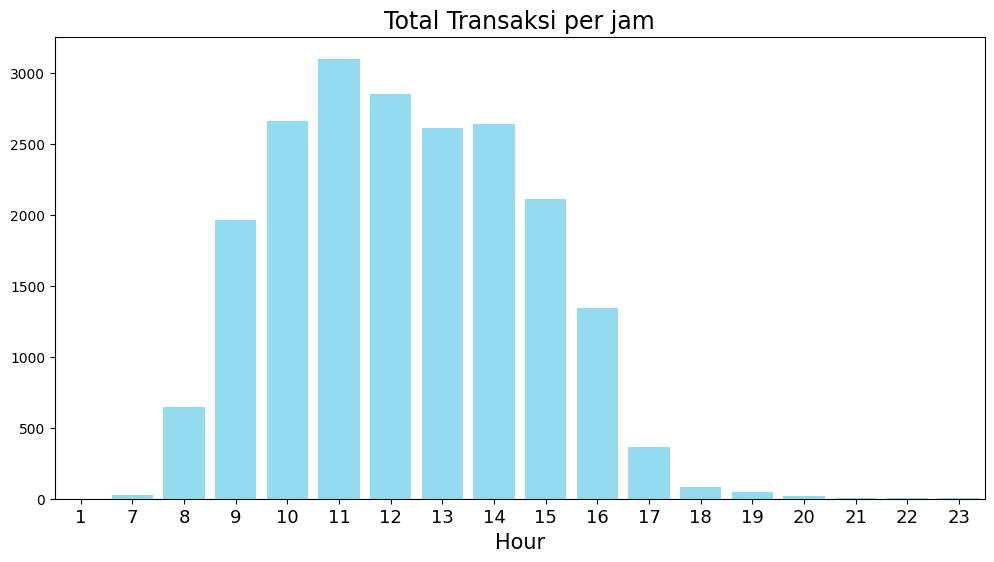

In [ ]:
# Transaksi Tiap Jam
data_perhour = data.groupby('hour')['Transaction'].count()

plt.figure(figsize= (12,6))
sns.barplot(
    x = data_perhour.index,
    y = data_perhour.values, color="#85E3FF")
plt.xlabel('Hour', size = 15)
plt.title("Total Transaksi per jam", size = 17)
plt.xticks(size = 13)
plt.show()

In [ ]:
data["Item"] = data["Item"].apply(lambda item: item.lower())
data["Item"] = data["Item"].apply(lambda item: item.strip())
data = data[["Transaction", "Item"]].copy()
data.head(10)

,Transaction,Item
0,1,bread
1,2,scandinavian
2,2,scandinavian
3,3,hot chocolate
4,3,jam
5,3,cookies
6,4,muffin
7,5,coffee
8,5,pastry
9,5,bread


In [ ]:
from mlxtend.frequent_patterns import association_rules, apriori

In [ ]:
item_count = data.groupby(["Transaction","Item"])["Item"].count().reset_index(name = "Count")
item_count.head()

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1


In [ ]:
item_count_pivot = item_count.pivot_table(index="Transaction", columns = "Item",
                                          values = "Count", aggfunc = "sum").fillna(0)
print("Ukuran dataset : ", item_count_pivot.shape)

Ukuran dataset :  (9465, 94)


In [ ]:
item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def encode(x):
  if x <= 0:
    return 0
  elif x >= 1 :
    return 1


item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("Ukuran dataset :", item_count_pivot.shape)
print("Jumlah transaksi : ", item_count_pivot.shape[0])
print("Jumlah items :", item_count_pivot.shape[1])

Ukuran dataset : (9465, 94)
Jumlah transaksi :  9465
Jumlah items : 94


In [ ]:
support = 0.01
frequent_items = apriori(item_count_pivot, min_support = support , use_colnames= True)
frequent_items.sort_values("support", ascending = False).head(10)

,support,itemsets
6,0.478394,(coffee)
2,0.327205,(bread)
26,0.142631,(tea)
4,0.103856,(cake)
34,0.090016,"(bread, coffee)"
19,0.086107,(pastry)
21,0.071844,(sandwich)
16,0.061807,(medialuna)
12,0.058320,(hot chocolate)
42,0.054728,"(cake, coffee)"


In [ ]:
metric = "lift"
min_threshold = 1
rules = association_rules(frequent_items, metric=metric, min_threshold = min_threshold)[["antecedents", "consequents","support","confidence","lift"]]
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(15)

,antecedents,consequents,support,confidence,lift
30,(toast),(coffee),0.023666,0.704403,1.472431
28,(spanish brunch),(coffee),0.010882,0.598837,1.251766
18,(medialuna),(coffee),0.035182,0.569231,1.189878
22,(pastry),(coffee),0.047544,0.552147,1.154168
0,(alfajores),(coffee),0.019651,0.540698,1.130235
16,(juice),(coffee),0.020602,0.534247,1.116750
24,(sandwich),(coffee),0.038246,0.532353,1.112792
6,(cake),(coffee),0.054728,0.526958,1.101515
27,(scone),(coffee),0.018067,0.522936,1.093107
12,(cookies),(coffee),0.028209,0.518447,1.083723


ModuleNotFoundError: No module named 'streamlit'